# Capstone Project – Stellar Classification (EDA & Baseline Model)

# Introduction

**Goal:** The goal of this project is to classify stars into different star types based on their physical characteristics. We will be training multiple classification models (Decision Tree, K-Nearest Neighbors, and Random Forest) to predict star type from astronomical measurements such as temperature, luminosity, radius, and magnitude, and comparing their performances to determine which model is most effective for this dataset.

**Data Problem:** The data task is to train and evaluate supervised multi-class classification models that assign each star to one of six star type classes based on its physical properties and categorical descriptors.

**Expected Results:** The expected results of this project are a set of models with high prediction accuracy that can be used to classify future/unseen stars using only their measured characteristics. The comparison between models will provide insight into which algorithms perform best for this type of astronomical classification problem.

We will analyze the dataset through exploratory data analysis (EDA), process the data through encoding and scaling steps, and then train three machine learning models. After evaluating model performance on a held-out test set, we will draw conclusions about model selection and suggest potential future work such as testing additional algorithms or incorporating larger astronomical datasets.

**Data**

The data is from Kaggle.

Link: https://www.kaggle.com/datasets/deepu1109/star-dataset

The dataset contains physical measurements of stars including temperature (in Kelvin), luminosity, radius, absolute magnitude, star color, spectral class, and a labeled star type category (0–5). The dataset consists of 240 total observations.


## 1. Import Libraries

In [34]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

## 2. Load Dataset

In [35]:
df = pd.read_csv("stellarclass.csv")

## 3. Exploratory Data Analysis (EDA)

The goal of this section is to understand the structure of the dataset, check data quality, and explore basic relationships between the features and the target variable.

Steps in this section include:

- Inspecting the shape, data types, and summary statistics
- Checking for missing values and duplicate rows
- Examining the distribution of the target variable (star type)
- Exploring the distributions of numerical features using histograms
- Reviewing the frequency of categories for star color and spectral class
- Plotting temperature versus luminosity as a simple HR-style diagram


In [36]:
df.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


In [37]:
df.shape

(240, 7)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.3+ KB


In [39]:
df.describe()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


In [40]:
df.isnull().sum()

Temperature (K)           0
Luminosity(L/Lo)          0
Radius(R/Ro)              0
Absolute magnitude(Mv)    0
Star type                 0
Star color                0
Spectral Class            0
dtype: int64

In [41]:
df.duplicated().sum()

0

In [42]:
df_clean = df.copy()

df_clean.head()


,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


In [43]:
df_clean['Star type'].value_counts()

Star type
0    40
1    40
2    40
3    40
4    40
5    40
Name: count, dtype: int64

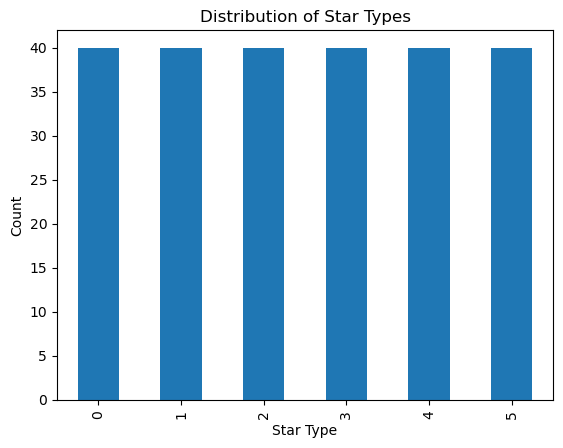

In [44]:
#Plot class distribution
df_clean['Star type'].value_counts().plot(kind='bar')
plt.xlabel('Star Type')
plt.ylabel('Count')
plt.title('Distribution of Star Types')
plt.show()


The bar chart above shows that the dataset is perfectly balanced, with 40 samples for each of the six star types (0–5). This balanced class distribution is useful for training classification models because it reduces the risk of bias toward a particular class.

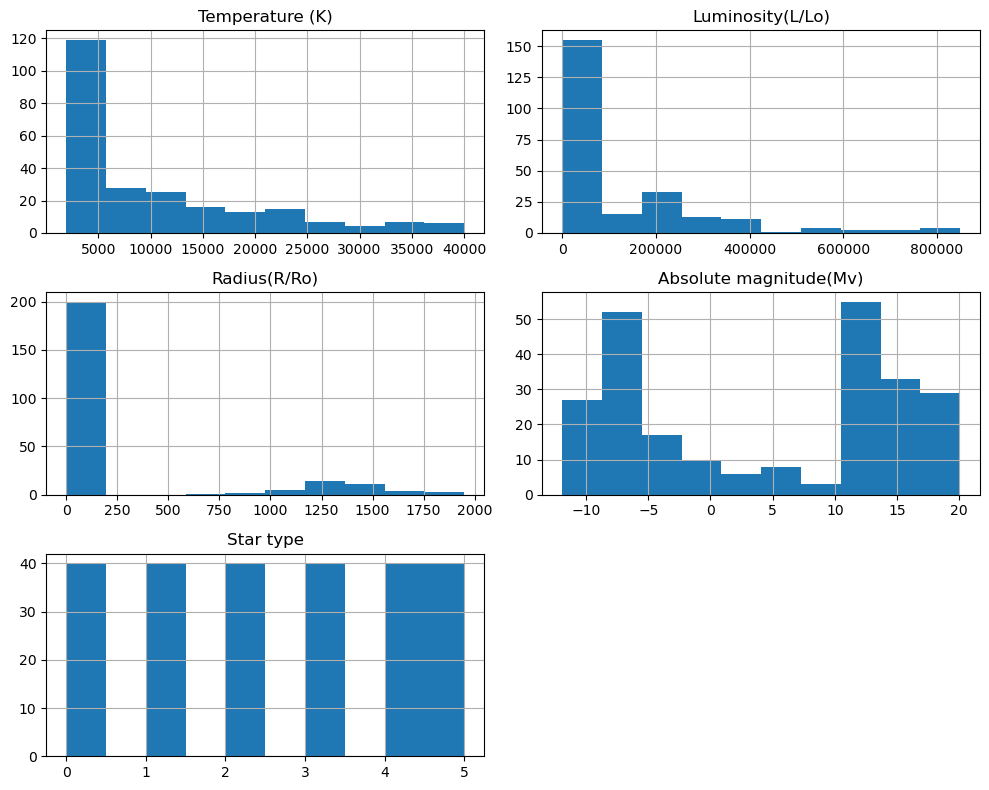

In [45]:
#Histograms for numeric features
df_clean.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()


The histograms provide an overview of the ranges and distributions of the numerical features. Temperature and luminosity span several orders of magnitude, while absolute magnitude and radius also show a wide range. These variations suggest that the features may be informative for distinguishing different star types.


In [46]:
#Categorical value counts
print(df_clean['Star color'].value_counts())
print()
print(df_clean['Spectral Class'].value_counts())


Star color
Red                   112
Blue                   55
Blue-white             26
Blue White             10
yellow-white            8
White                   7
Blue white              3
Yellowish White         3
white                   3
Whitish                 2
Orange                  2
yellowish               2
Pale yellow orange      1
White-Yellow            1
Blue                    1
Yellowish               1
Orange-Red              1
Blue white              1
Blue-White              1
Name: count, dtype: int64

Spectral Class
M    111
B     46
O     40
A     19
F     17
K      6
G      1
Name: count, dtype: int64


The value counts for star color and spectral class show that the categorical features are not evenly distributed. Some star colors and spectral classes are very common, while others appear only a few times. Star color also contains many variations of similar labels (for example, different forms of "blue-white"), which are handled using one-hot encoding in the modeling stage.


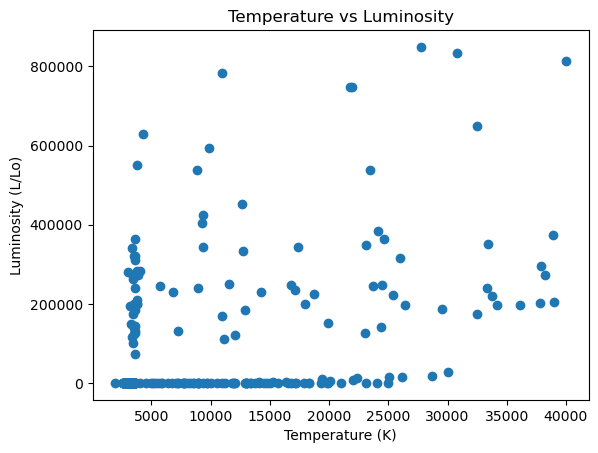

In [47]:
#Simple HR Diagram (Temperature vs Luminosity)
plt.scatter(df_clean['Temperature (K)'], df_clean['Luminosity(L/Lo)'])
plt.xlabel('Temperature (K)')
plt.ylabel('Luminosity (L/Lo)')
plt.title('Temperature vs Luminosity')
plt.show()


The scatter plot of temperature versus luminosity shows clear groupings of stars, similar to a simplified Hertzsprung–Russell diagram. This suggests that physical properties such as temperature and luminosity are strongly related to star type and can be used effectively for classification.

## 4. Data Preprocessing

Before training the models, the data needs to be prepared in a format suitable for machine learning algorithms.

Key preprocessing steps:

- Categorical features ("Star color" and "Spectral Class") are converted into numerical form using one-hot encoding.
- The dataset is split into training and test sets using an 80/20 split, with stratification on the target variable to preserve class proportions.
- For the KNN model, numerical features are standardized using `StandardScaler` to ensure that all numeric features contribute fairly to the distance calculations.


In [48]:
categorical_cols = ['Star color', 'Spectral Class']

df_dt = pd.get_dummies(df_clean, columns=categorical_cols)


In [49]:
X_dt = df_dt.drop('Star type', axis=1)
y_dt = df_dt['Star type']

In [50]:
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(
    X_dt, y_dt, test_size=0.2, random_state=42, stratify=y_dt
)


## 5. Baseline Model: Decision Tree Classifier

The first model used is a Decision Tree classifier. This algorithm works by learning a set of decision rules based on feature values to split the data into different classes. Decision trees handle both numerical and one-hot encoded categorical features and do not require feature scaling. A `DecisionTreeClassifier` with a fixed random state is trained on the training data.

In [51]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_dt, y_train_dt)

DecisionTreeClassifier(random_state=42)

In [52]:
dt_accuracy = dt.score(X_test_dt, y_test_dt)
print("Decision Tree Accuracy:", dt_accuracy)

Decision Tree Accuracy: 1.0


In [53]:
dt_pred = dt.predict(X_test_dt)

print("\nClassification Report:\n")
print(classification_report(y_test_dt, dt_pred))


Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00         8

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48



The Decision Tree model achieved perfect accuracy on the test set. The classification report shows that all classes have precision, recall, and F1-scores of 1.0. This indicates that, for this dataset, a simple tree-based model is able to perfectly separate the star types based on their physical properties.

## 6. Second Model: K-Nearest Neighbors (KNN)

The second model used is the K-Nearest Neighbors (KNN) classifier. KNN is a distance-based algorithm that classifies a new sample based on the most common class among its k nearest neighbors in the feature space. Because KNN relies on distance calculations, numerical features are standardized before training. A `KNeighborsClassifier` with `k = 5` is trained on the scaled training data.

In [54]:
#KNN

numeric_cols = ['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)']
categorical_cols = ['Star color', 'Spectral Class']


In [55]:
df_encoded = pd.get_dummies(df_clean, columns=categorical_cols)


In [56]:
X = df_encoded.drop('Star type', axis=1)
y = df_encoded['Star type']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [58]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [59]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [60]:
knn_accuracy = knn.score(X_test_scaled, y_test)
print("KNN Accuracy:", knn_accuracy)

KNN Accuracy: 0.8958333333333334


In [61]:
knn_pred = knn.predict(X_test_scaled)

print("\nClassification Report:\n")
print(classification_report(y_test, knn_pred))


Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.80      1.00      0.89         8
           2       0.88      0.88      0.88         8
           3       0.88      0.88      0.88         8
           4       0.86      0.75      0.80         8
           5       1.00      0.88      0.93         8

    accuracy                           0.90        48
   macro avg       0.90      0.90      0.90        48
weighted avg       0.90      0.90      0.90        48



The KNN model achieved high accuracy on the test set, but it did not reach perfect accuracy like the Decision Tree model. This difference is expected because KNN is sensitive to the choice of k, the scaling of features, and the high dimensionality introduced by one-hot encoding. Even with these limitations, KNN still performs well and confirms that the features contain useful information for predicting star type.


## 7. Additional Model: Random Forest Classifier

In this section, a Random Forest classifier is used as an additional model. 

In [62]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train_dt, y_train_dt)

rf_accuracy = rf.score(X_test_dt, y_test_dt)
print("Random Forest Accuracy:", rf_accuracy)


Random Forest Accuracy: 1.0


In [63]:
rf_pred = rf.predict(X_test_dt)

print("\nClassification Report:\n")
print(classification_report(y_test_dt, rf_pred))



Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00         8

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48



The Random Forest classifier achieved high accuracy on the test set, with performance that is comparable to the single Decision Tree. This is expected because Random Forest combines many trees, which helps reduce overfitting and improves generalization.


## 8. Model Comparison and Conclusion

Three models were trained and evaluated on the star classification task: a Decision Tree classifier, a K-Nearest Neighbors (KNN) classifier, and a Random Forest classifier.

- The Decision Tree model achieved perfect accuracy on the test set. This suggests that the star types in this dataset are strongly separated based on the provided physical features.
- The KNN model achieved lower accuracy than the tree-based models, but still performed reasonably well. Its performance is influenced by feature scaling and the high number of one-hot encoded categorical features, which can affect distance-based methods.
- The Random Forest model also achieved very high accuracy on the test set. This outcome is expected because Random Forest builds an ensemble of trees, which generally improves stability and reduces overfitting compared to a single decision tree.

Overall, the tree-based models (Decision Tree and Random Forest) performed the best for this dataset, with Random Forest offering improved generalization over a single tree. The results show that physical properties such as temperature, luminosity, radius, and absolute magnitude are effective predictors of star type.
